# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [41]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Challenge 1 - Import and Describe the Dataset

#### In this challenge we will use the `austin_weather.csv` file. 

#### First import it into a data frame called `austin`.

In [42]:
# Your code here
austin=pd.read_csv('austin_weather.csv')
austin.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Next, describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [43]:
# Your code here
austin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [44]:
# Your code here
austin.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [5]:
# Your code here


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [45]:
# Your code here
austin.DewPointAvgF=pd.to_numeric(austin.DewPointAvgF,errors='coerce')
#austin
austin.DewPointAvgF.unique()

array([49., 36., 27., 28., 40., 39., 41., 26., 42., 22., 48., 32.,  8.,
       11., 45., 55., 61., 37., 47., 25., 23., 20., 33., 30., 29., 17.,
       14., 13., 54., 59., 15., 24., 34., 35., 57., 50., 53., 60., 46.,
       56., 51., 31., 38., 62., 43., 63., 64., 67., 66., 58., 70., 68.,
       65., 69., 71., 72., nan, 73., 74., 21., 44., 52., 12., 75., 76.,
       18.])

In [7]:
# Your observation here


The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [8]:
wrong_type_columns = ['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 
                      'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 
                      'SeaLevelPressureAvgInches' ,'SeaLevelPressureLowInches', 'VisibilityHighMiles',
                      'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 
                      'WindGustMPH', 'PrecipitationSumInches']

In [46]:
# Your code here
def clean_columns(data,list_):
    for i in list_:
        data[i]=pd.to_numeric(data[i],errors='coerce')

clean_columns(austin,wrong_type_columns)
austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1319 non-null   object 
 1   TempHighF                   1319 non-null   int64  
 2   TempAvgF                    1319 non-null   int64  
 3   TempLowF                    1319 non-null   int64  
 4   DewPointHighF               1312 non-null   float64
 5   DewPointAvgF                1312 non-null   float64
 6   DewPointLowF                1312 non-null   float64
 7   HumidityHighPercent         1317 non-null   float64
 8   HumidityAvgPercent          1317 non-null   float64
 9   HumidityLowPercent          1317 non-null   float64
 10  SeaLevelPressureHighInches  1316 non-null   float64
 11  SeaLevelPressureAvgInches   1316 non-null   float64
 12  SeaLevelPressureLowInches   1316 non-null   float64
 13  VisibilityHighMiles         1307 

#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [10]:
# Your code here


# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [47]:
# Your code here
austin['missing_values']=austin.isnull().any(axis=1)
austin

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events,missing_values
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm",False
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,,False
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,,False
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,,False
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,,True
5,2013-12-26,57,48,39,39.0,36.0,33.0,79.0,63.0,47.0,...,30.34,10.0,9.0,7.0,12.0,3.0,17.0,0.00,,False
6,2013-12-27,60,53,45,41.0,39.0,37.0,83.0,65.0,47.0,...,30.34,10.0,9.0,7.0,7.0,1.0,11.0,NaN,,True
7,2013-12-28,62,51,40,43.0,39.0,33.0,92.0,64.0,36.0,...,30.04,10.0,10.0,7.0,10.0,2.0,14.0,NaN,,True
8,2013-12-29,64,50,36,49.0,41.0,28.0,92.0,76.0,60.0,...,29.99,10.0,10.0,4.0,17.0,5.0,24.0,0.00,,False
9,2013-12-30,44,40,35,31.0,26.0,21.0,75.0,60.0,45.0,...,30.26,10.0,10.0,10.0,13.0,5.0,21.0,0.00,,False


There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [48]:
# Your code here
count_=austin[austin.missing_values==True].count(axis=0)
count_.missing_values

136

#### Calculate the ratio of missing rows to total rows

In [49]:
# Your code here
ratio=count_.missing_values*100/(austin.count(axis=0))
ratio.missing_values

10.310841546626232

As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [50]:
# Your code here
austin.isna().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
missing_values                  0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [52]:
# Your code here
ratio2=(austin.isna().sum().PrecipitationSumInches)*100/(austin.count(axis=0))
ratio2.PrecipitationSumInches
print(ausitn)

Date                          1319
TempHighF                     1319
TempAvgF                      1319
TempLowF                      1319
DewPointHighF                 1312
DewPointAvgF                  1312
DewPointLowF                  1312
HumidityHighPercent           1317
HumidityAvgPercent            1317
HumidityLowPercent            1317
SeaLevelPressureHighInches    1316
SeaLevelPressureAvgInches     1316
SeaLevelPressureLowInches     1316
VisibilityHighMiles           1307
VisibilityAvgMiles            1307
VisibilityLowMiles            1307
WindHighMPH                   1317
WindAvgMPH                    1317
WindGustMPH                   1315
PrecipitationSumInches        1195
Events                        1319
missing_values                1319
dtype: int64


Over 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. It doesn't make sense to *guess* its missing values because the estimation will be too 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [16]:
# Your code here 
austin.drop(columns='PrecipitationSumInches', inplace=True)
# Print `austin` to confirm the column is indeed removed
austin



,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,False
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,False
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,False
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,,False
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,,False
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,,False
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,,False


#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [17]:
# Your code here
austin_fixed=austin.interpolate(inplace=False)
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,,False
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,,False
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,,False
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,,False
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,,False
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,,False
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,,False


#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [18]:
# Your code herea
print(austin_fixed.isna().sum())
print(austin.isna().sum())



Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
Events                        0
missing_values                0
dtype: int64
Date                           0
TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [19]:
# Your code here:
austin.Events.value_counts()

                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Fog , Thunderstorm             1
Rain , Snow                    1
Name: Events, dtype: int64

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [20]:
# Your answer:
#Rain

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [21]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here
def dummy0(data,list_):
    for i in event_list:
        data[i]=0
        
dummy0(austin_fixed,event_list)
# Print your new dataframe to check whether new columns have been created:

austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,0,0
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,7.0,10.0,2.0,16.0,,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,10.0,12.0,5.0,21.0,,False,0,0,0,0
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,10.0,14.0,5.0,20.0,,False,0,0,0,0
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,10.0,12.0,4.0,17.0,,False,0,0,0,0
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,10.0,13.0,4.0,20.0,,False,0,0,0,0


#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [22]:
# Your code here
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']
for i in event_list:
    austin_fixed[i]=austin_fixed.Events.str.contains(i,regex=False).astype(int)

#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [23]:
# Your code here
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,7.0,10.0,2.0,16.0,,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,10.0,12.0,5.0,21.0,,False,0,0,0,0
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,10.0,14.0,5.0,20.0,,False,0,0,0,0
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,10.0,12.0,4.0,17.0,,False,0,0,0,0
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,10.0,13.0,4.0,20.0,,False,0,0,0,0


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [24]:
# Your code here
#austin.drop(columns='Events', inplace=True)

# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [25]:
# Your code here
from datetime import datetime as dt
for i in austin_fixed.Date:
   austin_fixed.Date= dt.strptime(i,'%Y-%m-%d').date().toordinal()


#### Print `austin_fixed` to check your `Date` column.

In [26]:
austin_fixed.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values,Snow,Fog,Rain,Thunderstorm
0,736541,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1
1,736541,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,736541,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,736541,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,736541,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,7.0,10.0,2.0,16.0,,True,0,0,0,0


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [27]:
# Your code here:
X=austin_fixed[['TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']]
y=austin_fixed['Events']

In the next cell, import `train_test_split` from `sklearn.model_selection`

In [28]:
#Your code here:
from sklearn.model_selection import train_test_split 


Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [29]:
#Your code here:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)


#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [30]:
# Your code here:
ts_rows=round(austin_fixed.shape[0]*0.80)
ts_rows

1055

Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

In [31]:
# Your code here:

X_ts_train=X[:ts_rows]
X_ts_test=X[ts_rows:]
X_ts_train, X_ts_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)

Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

In [32]:
# Your code here:
y_ts_train=y[:ts_rows]
y_ts_test=y[ts_rows:]

# Bonus Challenge 2

As explained in the README, the main purpose of this lab is to show you the typical process of preparing data for machine learning which sometimes takes up 90% of your time. Data cleaning is a valuable skill to learn and you need to be proficient at various techniques including the ones we showed you above as well as others you'll learn in the future. In the real world this skill will help you perform your job successfully and efficiently.

Now that we're done with data praparation, if you want to expeirence what you'll do in the rest 10% of your time, let's make the final leap.

We will use scikit-learn's [*Support Vector Machines*](https://scikit-learn.org/stable/modules/svm.html) to compute the fit of our training data set, the test on our test data set.

#### In the cell below, import `svm` from `sklearn`:

In [33]:
# Your code here
from sklearn.svm import SVC
austin_fixed

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values,Snow,Fog,Rain,Thunderstorm
0,736541,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1
1,736541,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,5.0,16.0,6.0,25.0,,False,0,0,0,0
2,736541,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,8.0,3.0,12.0,,False,0,0,0,0
3,736541,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,7.0,12.0,4.0,20.0,,False,0,0,0,0
4,736541,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,7.0,10.0,2.0,16.0,,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,736541,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,10.0,12.0,5.0,21.0,,False,0,0,0,0
1315,736541,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,10.0,14.0,5.0,20.0,,False,0,0,0,0
1316,736541,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,10.0,12.0,4.0,17.0,,False,0,0,0,0
1317,736541,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,10.0,13.0,4.0,20.0,,False,0,0,0,0


#### Now, call `svm.SVC.fit()` on `X_train` and `y_train`. Assign the returned value to a variable called `clf` which stands for *classifier*. Then obtain the test score for `X_test` and `y_test` by calling `clf.score()`.

In [34]:
# Your code here
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Si tomamos 2 variables a entrenar podemos  hacer una grafica de decisión
#Ejemplo: 'TempHighF', 'TempLowF',
#Podemos seleccionar 'Events' para la claisificación
#Limpiar Events
austin_fixed=austin_fixed.loc[austin_fixed['Events']!=' ']
#Elegimos las primeras 200 filas para hacer un ejemplo
austin_fixed_200=austin_fixed.iloc[:100]
X=austin_fixed_200[['TempHighF','TempLowF']]

# define example
data = austin_fixed_200['Events']
values = array(data)
# integer encode
label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
austin_fixed_200['Events_new']=label_encoder.fit_transform(values)
# binary encode
y=austin_fixed_200['Events_new']
#transformamos events en  target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1)
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train,y_train)
print(len(np.unique(y)))
austin_fixed_200


7


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,WindHighMPH,WindAvgMPH,WindGustMPH,Events,missing_values,Snow,Fog,Rain,Thunderstorm,Events_new
0,736541,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,20.0,4.0,31.0,"Rain , Thunderstorm",False,0,0,1,1,5
18,736541,53,47,40,51.0,45.0,30.0,93.0,75.0,57.0,...,12.0,1.0,18.0,Rain,False,0,0,1,0,3
19,736541,70,62,53,60.0,55.0,50.0,93.0,80.0,66.0,...,12.0,3.0,19.0,Fog,False,0,1,0,0,0
20,736541,72,65,57,64.0,61.0,54.0,93.0,81.0,68.0,...,13.0,6.0,21.0,Rain,False,0,0,1,0,3
22,736541,67,57,46,58.0,47.0,33.0,84.0,68.0,52.0,...,15.0,4.0,24.0,Rain,False,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,736541,67,63,58,64.0,62.0,56.0,100.0,97.0,93.0,...,20.0,7.0,28.0,"Fog , Rain , Thunderstorm",False,0,1,1,1,2
348,736541,66,62,58,65.0,61.0,55.0,100.0,94.0,87.0,...,12.0,3.0,16.0,Rain,False,0,0,1,0,3
349,736541,75,69,63,66.0,64.0,59.0,100.0,82.0,64.0,...,12.0,5.0,20.0,Rain,False,0,0,1,0,3
354,736541,66,57,47,57.0,50.0,45.0,93.0,75.0,56.0,...,8.0,1.0,11.0,Rain,False,0,0,1,0,3


In [35]:
pd.options.display.max_rows = None
austin_fixed_200['Events_new']

0      5
18     3
19     0
20     3
22     3
33     4
37     3
38     3
42     3
43     3
45     3
50     0
51     3
52     3
57     0
66     3
67     3
70     0
71     3
72     5
73     3
77     5
78     3
79     3
84     1
90     0
95     3
96     3
97     6
102    3
104    3
106    5
107    5
114    2
117    3
118    3
121    5
126    3
138    3
139    5
142    2
143    5
144    3
153    1
155    6
156    5
157    2
169    3
170    5
173    5
179    3
184    5
185    2
186    2
187    3
194    5
195    6
206    5
207    5
208    2
209    5
215    3
233    5
241    6
248    5
251    5
257    2
258    3
259    5
260    5
265    5
266    3
269    5
270    5
271    2
272    3
273    3
280    3
285    5
286    6
292    3
294    1
295    5
296    5
305    3
306    3
313    3
314    3
318    3
319    3
320    3
329    3
330    1
334    1
335    1
336    2
348    3
349    3
354    3
355    3
Name: Events_new, dtype: int32

#### You now see the model fit score of your test data set. If it's extremely low, it means your selected model is not a good fit and you should try other models.

#### In addition to fitting `X_train`, `y_train`, `X_test`, and `y_test`, you can also fit `X_ts_train`, `y_ts_train`, `X_ts_test`, and `y_ts_test` if you completed Bonus Challenge 1.

In [36]:
# Your code here
def plot_decision_regions(X,y, classifier, resolution=0.02): 
    #colores
    markers=('s','o','x','v','b','1','2')
    colors=('red','blue','green','gray','cyan','Aqua','Yellow')
    cmap=ListedColormap(colors[:len(np.unique(y))]) #va a elegir n colores de acuerdo a las n etiquetas que existen 
    
    #superficie de decisión
    x1_min , x1_max= (X.iloc[:,0].min())-1,(X.iloc[:,0].max())+1
    x2_min,x2_max= X.iloc[:,1].min()-1,X.iloc[:,1].max()+1

    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
     
    #altura
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(z)
    print('--')
    z=z.reshape(xx1.shape) # despues del predict veremos como deja el arreglo
    print(z)
    plt.contourf(xx1,xx2,z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #representemos muestras de clase
    print(list(enumerate(np.unique(y))))
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],y=X[y==c1,1], alpha=0.8,c=colors[idx],marker=markers[idx],label=c1,edgecolor='black')
        


[3 3 3 ... 5 5 5]
--
[[3 3 3 ... 5 5 5]
 [3 3 3 ... 5 5 5]
 [3 3 3 ... 5 5 5]
 ...
 [3 3 3 ... 5 5 5]
 [3 3 3 ... 5 5 5]
 [3 3 3 ... 5 5 5]]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]


TypeError: '(0      False
18     False
19      True
20     False
22     False
33     False
37     False
38     False
42     False
43     False
45     False
50      True
51     False
52     False
57      True
66     False
67     False
70      True
71     False
72     False
73     False
77     False
78     False
79     False
84     False
90      True
95     False
96     False
97     False
102    False
104    False
106    False
107    False
114    False
117    False
118    False
121    False
126    False
138    False
139    False
142    False
143    False
144    False
153    False
155    False
156    False
157    False
169    False
170    False
173    False
179    False
184    False
185    False
186    False
187    False
194    False
195    False
206    False
207    False
208    False
209    False
215    False
233    False
241    False
248    False
251    False
257    False
258    False
259    False
260    False
265    False
266    False
269    False
270    False
271    False
272    False
273    False
280    False
285    False
286    False
292    False
294    False
295    False
296    False
305    False
306    False
313    False
314    False
318    False
319    False
320    False
329    False
330    False
334    False
335    False
336    False
348    False
349    False
354    False
355    False
Name: Events_new, dtype: bool, 0)' is an invalid key

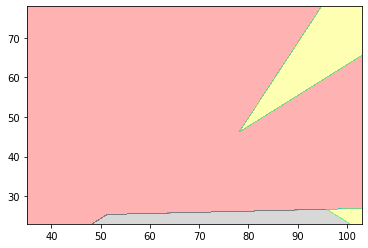

In [37]:
plot_decision_regions(X, y, classifier=svm)
plt.show()


#### We hope you have learned a lot of useful stuff in this lab!